# Dibetes Prediction
predicting whether the person is having diabetics or not

# <h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Downloading the Data</a></li>
        <li><a href="#visualization">Visualization</a></li>
        <li><a href="#setting_up_data">Setting up the Logistic Regression</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

<div id="about_dataset">
    <h2>About the dataset</h2>
    The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

We’ll be using Python and some of its popular data science related packages. First of all, we will import pandas to read our data from a CSV file and manipulate it for further use. We will also use numpy to convert out data into a format suitable to feed our classification model. We’ll use seaborn and matplotlib for visualizations. We will then import Logistic Regression algorithm from sklearn. This algorithm will help us build our classification model.
</div>

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    From kaggle #https://www.kaggle.com/kandij/diabetes-dataset
</div>


In [44]:
diab_df = pd.read_csv("diabetes2.csv")

In [45]:
diab_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [46]:
X = np.asarray(diab_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
X[0:5]
Y = np.asarray(diab_df[['Outcome']])
Y[0:5]

array([[1],
       [0],
       [1],
       [0],
       [1]], dtype=int64)

In [47]:
diab_df.shape

(768, 9)

In [48]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


C:\Users\Mrigank\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


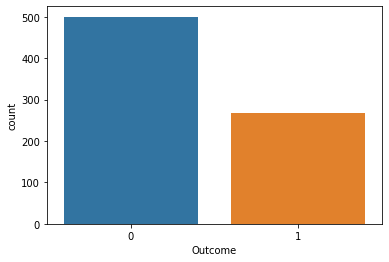

In [49]:
sns.countplot(x='Outcome',data=diab_df)

From countplot, we get data is not so balanced as Outcome (Target) has 500 count for 0 (No) and 300 for 1 (Yes) values

In [50]:
diab_df['Age'].head(10)

0    50
1    31
2    32
3    21
4    33
5    30
6    26
7    29
8    53
9    54
Name: Age, dtype: int64

In [51]:
# np.histogram #returns 2 values
#count, bin_edges = np.histogram(diab_df['Age']

# frequency count
#print(count) 
#print(bin_edges) # bin ranges, default = 10 bins

In [52]:
diab_age = diab_df[['Age','BMI']]
diab_age.head(5)

,Age,BMI
0,50,33.6
1,31,26.6
2,32,23.3
3,21,28.1
4,33,43.1


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the data using box plot, heatmap of correlation and pair plot using seaborn
</div>

In [53]:
#diab_df.plot(kind='bar', figsize=(10,6))
#plt.show()

C:\Users\Mrigank\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
C:\Users\Mrigank\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
C:\Users\Mrigank\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
C:\Users\Mrigank\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
C:\Users\Mrigank\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
C:\Users\Mrigank\Anaconda3\lib\site-packages\seaborn\categorical.py:46

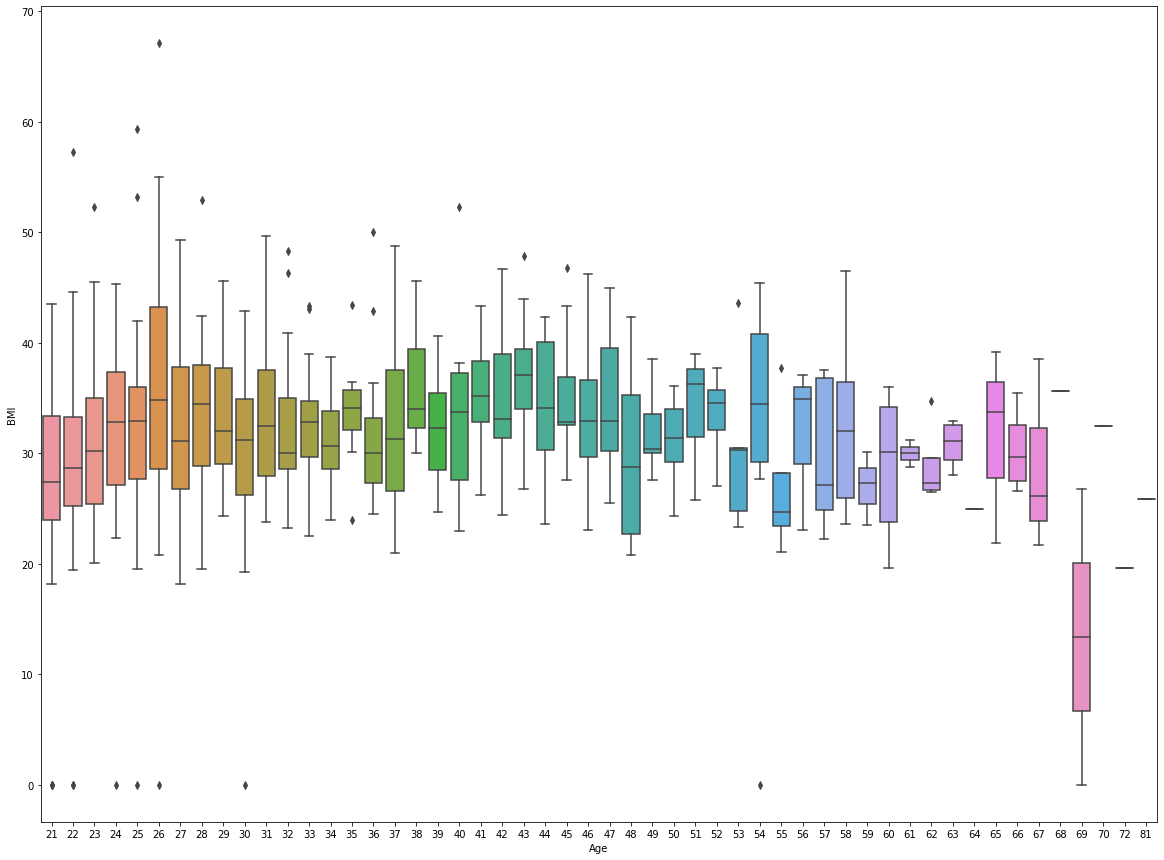

In [54]:
plt.subplots(figsize=(20,15))
sns.boxplot('Age','BMI', data=diab_df)


C:\Users\Mrigank\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Mrigank\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


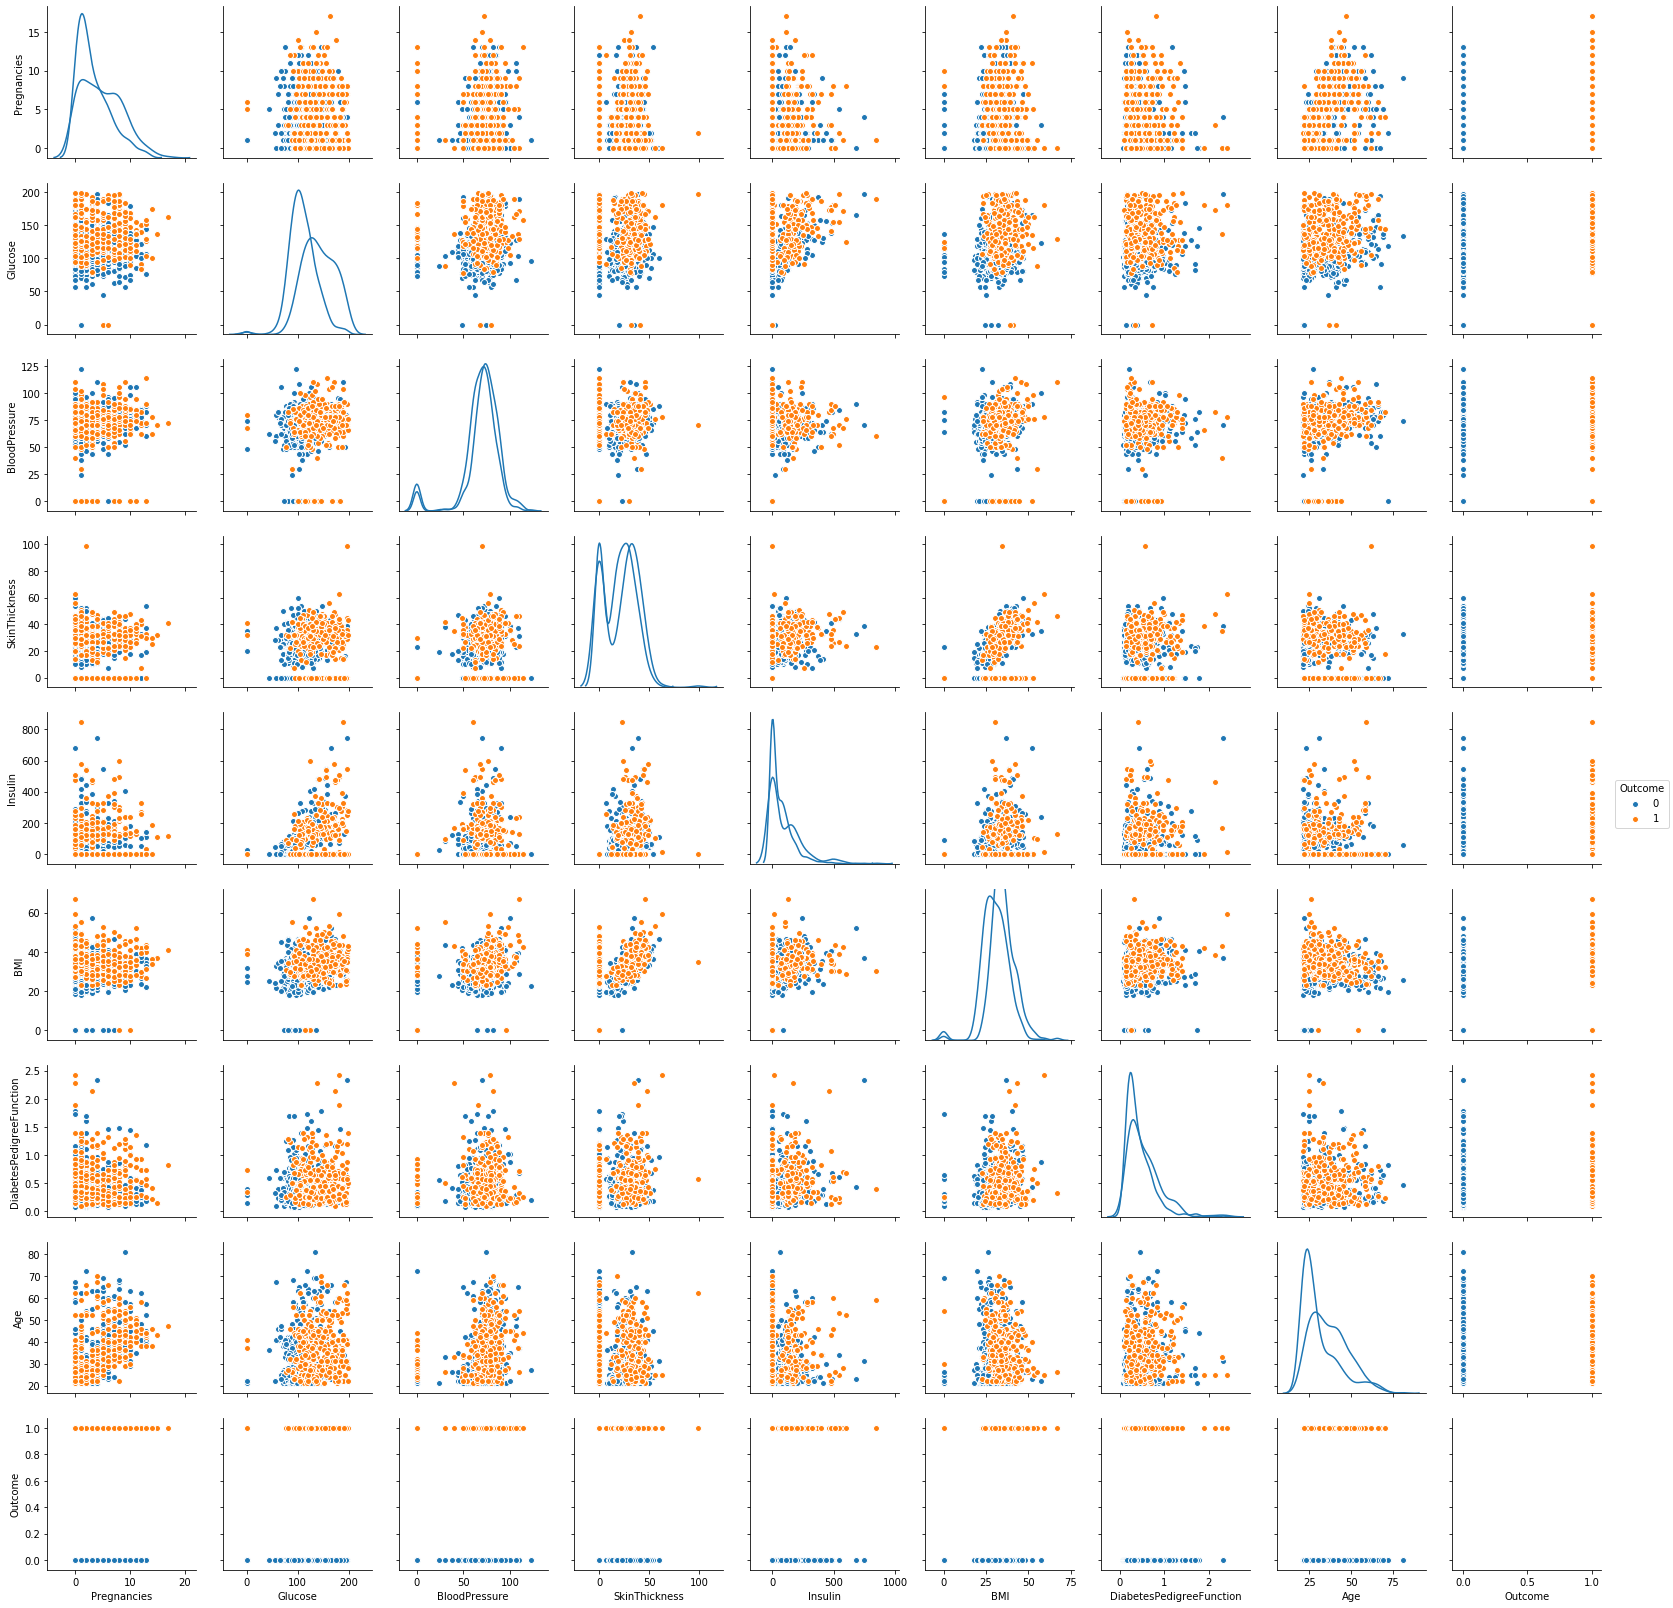

In [55]:
sns.pairplot(diab_df, diag_kind='kde', hue='Outcome')

From pair plots, we observe that most of the attributes are not separating both classes of Outcome very well e.g. Skin Thickness have overlap even in case of outliers i.e. not so good attribute for prediction of Outcome

In [56]:
diab_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


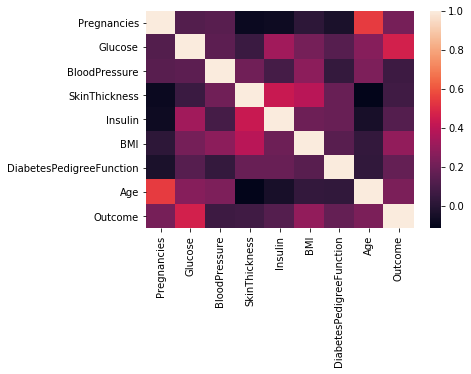

In [57]:
sns.heatmap(diab_df.corr())

We can see from above correlation heatmap plot that Outcome of is highly correlated with Glusose feature followed by BMI, Age, DiabetesPedigreeFunction, Insulin, Preganancies and less correlated with SkinThicness and BloodPressure features


<div id="setting_up_data">
    <h2>Setting up the Logistic Regression</h2>
    We will be using <b>train/test split</b> on our <b>data</b>. Let's import <b>train_test_split</b> from <b>sklearn.model_selection</b>.
</div>


<div id="modeling">
<h2>Modeling</h2>
    We will first create an instance of the <b>Logistic Regression</b> called <b>logmodel</b>.
</div>

x = diab_df.drop('Outcome', axis = 1)
y = diab_df['Outcome']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)


In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()

In [62]:
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predictions</b>.
</div>

In [63]:
predictions = logmodel.predict(x_test)

<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the claasification report and accuracy of our model.
</div>

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.79      0.91      0.84       150
          1       0.76      0.56      0.64        81

avg / total       0.78      0.78      0.77       231



Overall, recall is 78 %, which seems good. However, recall for non-diabetic class (0) is high and diabetic class is only 56% so this model is not very well fitted. This hapens when we have poor attributes and class are underrepresented in data.

In [66]:
#The support is the number of occurrences of each class in y_true i.e. correct (target values)

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [68]:
confusion_matrix(y_test, predictions)

array([[136,  14],
       [ 36,  45]], dtype=int64)

In [69]:
print(accuracy_score(y_test, predictions))

0.78354978355
